In [1]:
#Load in data

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np


In [3]:
mobility=pd.read_csv('https://github.com/ils246/covid-19/blob/main/mobility_metrics.csv?raw=true')

In [4]:
mun_info=pd.read_csv('https://github.com/ils246/covid-19/blob/main/muni_level_info.csv?raw=true')

In [5]:
master=pd.merge(left=mobility,right=mun_info,left_on="code",right_on="code")
master

,Unnamed: 0,Municipality,code,"rel change, daily distance traveled (median)","rel change, daily distance traveled (25%)","rel change, daily distance traveled (75%)","change, 1 km trip frequency (median)","change, 1 km trip frequency (25%)","change, 1 km trip frequency (75%)",commutes disrupted (%),"change, 1 km trip frequency (mean)",name,population,formality,GDPpc,complexity,allowed_m
0,0,Neiva,41001,-59.546239,-92.481268,-14.556958,-34.442627,-51.240256,-16.280315,50.5447,-35.946357,NEIVA,357392.0,0.327433,15225912,1.549467,0.20
1,1,Ibagué,73001,-77.492687,-94.419512,-31.214966,-33.333333,-51.325758,-18.181818,40.5594,-35.544377,IBAGUE,529635.0,0.321524,14088926,1.858509,0.40
2,2,Armenia,63001,-65.207607,-90.335405,-18.549499,-34.431818,-50.080645,-20.469114,41.5663,-35.990106,ARMENIA,295208.0,0.359446,12866584,1.801525,0.20
3,3,Cúcuta,54001,-61.169547,-96.274566,-3.366753,-28.987557,-46.666667,-14.043310,43.0894,-32.078463,CUCUTA,711715.0,0.248640,11657334,2.080385,0.20
4,4,Riohacha,44001,-56.555008,-88.669466,-2.832379,-26.315789,-40.508366,-12.310606,37.6623,-27.404941,RIOHACHA,188014.0,0.154852,7646704,0.725588,0.20
5,5,Florencia,18001,-71.040238,-94.889763,-12.196352,-23.529412,-38.186813,-6.372549,23.4375,-25.013991,FLORENCIA,168346.0,0.185050,9995751,1.171781,0.10
6,6,Sincelejo,70001,-56.628357,-91.491065,-2.696869,-24.390244,-40.238095,-8.220721,12.5000,-24.382592,SINCELEJO,277773.0,0.205218,10994610,1.393832,0.30
7,7,Villavicencio,50001,-75.593246,-95.199297,-27.504938,-31.818182,-51.207729,-14.967532,46.0123,-34.469004,VILLAVICENCIO,531275.0,0.316379,14610080,1.712979,0.20
8,8,Popayán,19001,-63.332787,-90.943262,-9.584229,-34.188034,-51.219512,-20.000000,42.4658,-36.769612,POPAYAN,318059.0,0.381534,14774625,1.866582,0.10
9,9,Valledupar,20001,-70.797836,-96.833717,-9.062953,-28.781292,-45.498252,-11.386555,35.2025,-30.424076,VALLEDUPAR,490075.0,0.244612,10436973,1.511868,0.29


In [6]:
#regression table corresponding to Table 2b in paper (error estimates will differ because we are using OLS here rather than bootstrap regression scheme)
tf_tpw=sm.OLS(master["change, 1 km trip frequency (mean)"],np.stack((np.ones(len(master)),np.array(master["allowed_m"])*100),1)).fit()
tf_pop=sm.OLS(master["change, 1 km trip frequency (mean)"],np.stack((np.ones(len(master)),np.log10(master["population"])),1)).fit()
tf_tpwpop=sm.OLS(master["change, 1 km trip frequency (mean)"],np.stack((np.ones(len(master)),np.array(master["allowed_m"]*100),np.log10(master["population"])),1)).fit()
interaction_std=(np.array(master["allowed_m"]*100)-np.mean(np.array(master["allowed_m"]*100)))/np.std(np.array(master["allowed_m"]*100))*(np.log10(master["population"])-np.mean(np.log10(master["population"])))/np.std(np.log10(master["population"]))
tf_tpwpopint=sm.OLS(master["change, 1 km trip frequency (mean)"],np.stack((np.ones(len(master)),np.array(master["allowed_m"]*100),np.log10(master["population"]),interaction_std),1)).fit()


row1=["allowed_m",tf_tpw.params[1],np.nan,tf_tpwpop.params[1],tf_tpwpopint.params[1]]
row2=["log(pop_m)",np.nan,tf_pop.params[1],tf_tpwpop.params[2],tf_tpwpopint.params[2]]
row3=["interaction_m",np.nan,np.nan,np.nan,tf_tpwpopint.params[3]]
row4=["const_m",tf_tpw.params[0],tf_pop.params[0],tf_tpwpop.params[0],tf_tpwpopint.params[0]]
pd.DataFrame(np.stack((row1,row2,row3,row4),0),columns=["","I","II","III","IV"])

,,I,II,III,IV
0,allowed_m,-0.11673800599269474,nan,0.03546192212825072,0.04205018098408983
1,log(pop_m),nan,-9.073829201488353,-9.486679329238736,-9.131878467921023
2,interaction_m,nan,nan,nan,-0.25116471342032076
3,const_m,-29.974903776270786,19.250840943797463,20.73680145730978,18.64172420819432


In [7]:
#regression table corresponding to Table 2d in paper (error estimates will differ because we are using OLS here rather than bootstrap regression scheme)
ddt_tpw=sm.OLS(master["rel change, daily distance traveled (median)"],np.stack((np.ones(len(master)),np.array(master["allowed_m"])*100),1)).fit()
ddt_pop=sm.OLS(master["rel change, daily distance traveled (median)"],np.stack((np.ones(len(master)),np.log10(master["population"])),1)).fit()
ddt_tpwpop=sm.OLS(master["rel change, daily distance traveled (median)"],np.stack((np.ones(len(master)),np.array(master["allowed_m"]*100),np.log10(master["population"])),1)).fit()
interaction_std=(np.array(master["allowed_m"]*100)-np.mean(np.array(master["allowed_m"]*100)))/np.std(np.array(master["allowed_m"]*100))*(np.log10(master["population"])-np.mean(np.log10(master["population"])))/np.std(np.log10(master["population"]))
ddt_tpwpopint=sm.OLS(master["rel change, daily distance traveled (median)"],np.stack((np.ones(len(master)),np.array(master["allowed_m"]*100),np.log10(master["population"]),interaction_std),1)).fit()


row1=["allowed_m",ddt_tpw.params[1],np.nan,ddt_tpwpop.params[1],ddt_tpwpopint.params[1]]
row2=["log(pop_m)",np.nan,ddt_pop.params[1],ddt_tpwpop.params[2],ddt_tpwpopint.params[2]]
row3=["interaction_m",np.nan,np.nan,np.nan,ddt_tpwpopint.params[3]]
row4=["const_m",ddt_tpw.params[0],ddt_pop.params[0],ddt_tpwpop.params[0],ddt_tpwpopint.params[0]]
pd.DataFrame(np.stack((row1,row2,row3,row4),0),columns=["","I","II","III","IV"])

,,I,II,III,IV
0,allowed_m,-0.322154635088161,nan,-0.046132551933832255,-0.021707599457378546
1,log(pop_m),nan,-17.74163961456344,-17.20456128331947,-15.88919187147572
2,interaction_m,nan,nan,nan,-0.9311543950050782
3,const_m,-59.402670163250505,34.49860250472912,32.56551071366991,24.79833529391027


In [8]:
#standardize economic muni-level variables
std_pop=(np.log10(master["population"])-np.mean(np.log10(master["population"])))/np.std(np.log10(master["population"]))
std_gdppc=(master["GDPpc"]-np.mean(master["GDPpc"]))/np.std(master["GDPpc"])
std_formal=(master["formality"]*100-np.mean(master["formality"]*100))/np.std(master["formality"]*100)
std_complex=(master["complexity"]-np.mean(master["complexity"]))/np.std(master["complexity"])

In [9]:
#regression table corresponding to Table 3a in paper (error estimates will differ because we are using OLS here rather than bootstrap regression scheme)
tf_stdpop=sm.OLS(master["change, 1 km trip frequency (mean)"],np.stack((np.ones(len(master)),std_pop),1)).fit()
tf_stdcomp=sm.OLS(master["change, 1 km trip frequency (mean)"],np.stack((np.ones(len(master)),std_complex),1)).fit()
tf_stdgdppc=sm.OLS(master["change, 1 km trip frequency (mean)"],np.stack((np.ones(len(master)),std_gdppc),1)).fit()
tf_stdform=sm.OLS(master["change, 1 km trip frequency (mean)"],np.stack((np.ones(len(master)),std_formal),1)).fit()

row1=["GDPpc_m_std",tf_stdgdppc.params[1],np.nan,np.nan,np.nan]
row2=["complex_m_std",np.nan,tf_stdcomp.params[1],np.nan,np.nan]
row3=["log(pop_m)_std",np.nan,np.nan,tf_stdpop.params[1],np.nan]
row4=["formal_m_std",np.nan,np.nan,np.nan,tf_stdform.params[1]]
row5=["const",tf_stdgdppc.params[0],tf_stdcomp.params[0],tf_stdpop.params[0],tf_stdform.params[0]]
pd.DataFrame(np.stack((row1,row2,row3,row4,row5),0),columns=["","I","II","III","IV"])

,,I,II,III,IV
0,GDPpc_m_std,-4.125366265552042,nan,nan,nan
1,complex_m_std,nan,-3.9435982120463393,nan,nan
2,log(pop_m)_std,nan,nan,-3.5049770280278003,nan
3,formal_m_std,nan,nan,nan,-3.4620731259014006
4,const,-32.89335392608815,-32.89335392608815,-32.89335392608815,-32.89335392608815


In [10]:
#regression table corresponding to Table 3b in paper (error estimates will differ because we are using OLS here rather than bootstrap regression scheme)
ddt_stdpop=sm.OLS(master["rel change, daily distance traveled (median)"],np.stack((np.ones(len(master)),std_pop),1)).fit()
ddt_stdcomp=sm.OLS(master["rel change, daily distance traveled (median)"],np.stack((np.ones(len(master)),std_complex),1)).fit()
ddt_stdgdppc=sm.OLS(master["rel change, daily distance traveled (median)"],np.stack((np.ones(len(master)),std_gdppc),1)).fit()
ddt_stdform=sm.OLS(master["rel change, daily distance traveled (median)"],np.stack((np.ones(len(master)),std_formal),1)).fit()

row1=["log(pop_m)_std",ddt_stdpop.params[1],np.nan,np.nan,np.nan]
row2=["complex_m_std",np.nan,ddt_stdcomp.params[1],np.nan,np.nan]
row3=["GDPpc_m_std",np.nan,np.nan,ddt_stdgdppc.params[1],np.nan]
row4=["formal_m_std",np.nan,np.nan,np.nan,ddt_stdform.params[1]]
row5=["const",ddt_stdpop.params[0],ddt_stdcomp.params[0],ddt_stdgdppc.params[0],ddt_stdform.params[0]]
pd.DataFrame(np.stack((row1,row2,row3,row4,row5),0),columns=["","I","II","III","IV"])

,,I,II,III,IV
0,log(pop_m)_std,-6.85311988001636,nan,nan,nan
1,complex_m_std,nan,-5.939939156470246,nan,nan
2,GDPpc_m_std,nan,nan,-5.662252277481086,nan
3,formal_m_std,nan,nan,nan,-3.996965528547678
4,const,-67.45653604045454,-67.45653604045454,-67.45653604045454,-67.45653604045454


<AxesSubplot:xlabel='GDPpc', ylabel='rel change, daily distance traveled (median)'>

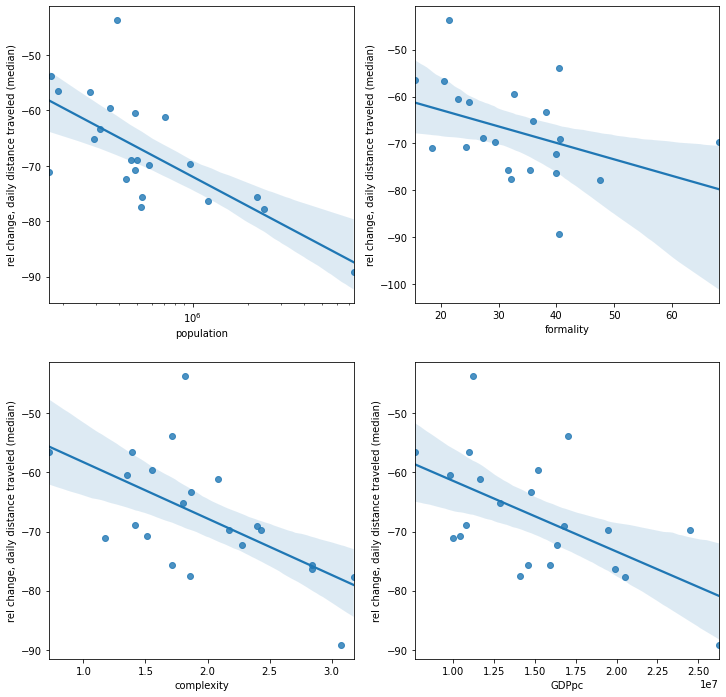

In [11]:
#plots similar to those in fig. 3
fig,ax=plt.subplots(2,2,figsize=(12,12))
sns.regplot(x=master["population"],y=master["rel change, daily distance traveled (median)"],logx=True,ax=ax[0,0])
ax[0,0].set_xscale('log')
sns.regplot(x=master["formality"]*100,y=master["rel change, daily distance traveled (median)"],ax=ax[0,1])
sns.regplot(x=master["complexity"],y=master["rel change, daily distance traveled (median)"],ax=ax[1,0])
sns.regplot(x=master["GDPpc"],y=master["rel change, daily distance traveled (median)"],ax=ax[1,1])

In [12]:
#regression table corresponding to Table S1 in paper (error estimates will differ because we are using OLS here rather than bootstrap regression scheme)
cd_tpw=sm.OLS(master["commutes disrupted (%)"],np.stack((np.ones(len(master)),np.array(master["allowed_m"])*100),1)).fit()
cd_pop=sm.OLS(master["commutes disrupted (%)"],np.stack((np.ones(len(master)),np.log10(master["population"])),1)).fit()
cd_tpwpop=sm.OLS(master["commutes disrupted (%)"],np.stack((np.ones(len(master)),np.array(master["allowed_m"]*100),np.log10(master["population"])),1)).fit()
interaction_std=(np.array(master["allowed_m"]*100)-np.mean(np.array(master["allowed_m"]*100)))/np.std(np.array(master["allowed_m"]*100))*(np.log10(master["population"])-np.mean(np.log10(master["population"])))/np.std(np.log10(master["population"]))
cd_tpwpopint=sm.OLS(master["commutes disrupted (%)"],np.stack((np.ones(len(master)),np.array(master["allowed_m"]*100),np.log10(master["population"]),interaction_std),1)).fit()


row1=["allowed_m",cd_tpw.params[1],np.nan,cd_tpwpop.params[1],cd_tpwpopint.params[1]]
row2=["log(pop_m)",np.nan,cd_pop.params[1],cd_tpwpop.params[2],cd_tpwpopint.params[2]]
row3=["interaction_m",np.nan,np.nan,np.nan,cd_tpwpopint.params[3]]
row4=["const_m",cd_tpw.params[0],cd_pop.params[0],cd_tpwpop.params[0],cd_tpwpopint.params[0]]
pd.DataFrame(np.stack((row1,row2,row3,row4),0),columns=["","I","II","III","IV"])




,,I,II,III,IV
0,allowed_m,0.2508162468513853,nan,-0.04886607986284697,-0.06158496852654277
1,log(pop_m),nan,18.11041100044644,18.679313251178037,17.994356458854597
2,interaction_m,nan,nan,nan,0.4848831984517523
3,const_m,35.587798374169914,-62.21613710361467,-64.26377188392006,-60.219144182358036


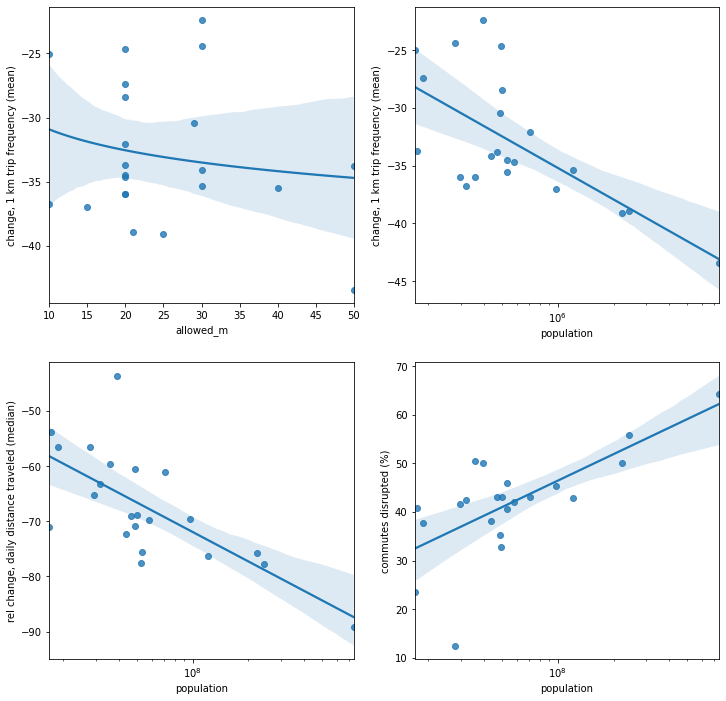

In [13]:
#plots similar to Fig 1d,1e, 2b, 5a
fig,ax=plt.subplots(2,2,figsize=(12,12))
sns.regplot(x=master["allowed_m"]*100,y=master["change, 1 km trip frequency (mean)"],logx=True,ax=ax[0,0])
sns.regplot(x=master["population"],y=master["change, 1 km trip frequency (mean)"],logx=True,ax=ax[0,1])
ax[0,1].set_xscale('log')
sns.regplot(x=master["population"]*100,y=master["rel change, daily distance traveled (median)"],logx=True,ax=ax[1,0])
sns.regplot(x=master["population"]*100,y=master["commutes disrupted (%)"],logx=True,ax=ax[1,1])
ax[1,1].set_xscale('log')
ax[1,0].set_xscale('log')

